In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


617

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=82a3590023f7b5920550450668242949


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [10]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1 
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 3 of Set 1 | new norfolk
Processing Record 4 of Set 1 | hamilton
Processing Record 5 of Set 1 | mar del plata
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | chokurdakh
Processing Record 8 of Set 1 | upernavik
Processing Record 9 of Set 1 | abu jubayhah
City not found. Skipping...
Processing Record 10 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 11 of Set 1 | port alfred
Processing Record 12 of Set 1 | hede
Processing Record 13 of Set 1 | atambua
Processing Record 14 of Set 1 | lufilufi
Processing Record 15 of Set 1 | faanui
Processing Record 16 of Set 1 | quatre cocos
Processing Record 17 of Set 1 | broken hill
Processing Record 18 of Set 1 | luderitz
Processing Record 19 of Set 1 | necochea
Processing Record 20 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 21 of Set 1 | salalah
Processin

Processing Record 36 of Set 4 | sawakin
Processing Record 37 of Set 4 | falconara marittima
Processing Record 38 of Set 4 | macduff
Processing Record 39 of Set 4 | atuona
Processing Record 40 of Set 4 | kodiak
Processing Record 41 of Set 4 | avera
Processing Record 42 of Set 4 | urdoma
Processing Record 43 of Set 4 | tiarei
Processing Record 44 of Set 4 | saint-philippe
Processing Record 45 of Set 4 | marabba
Processing Record 46 of Set 4 | kununurra
Processing Record 47 of Set 4 | kavieng
Processing Record 48 of Set 4 | asau
Processing Record 49 of Set 4 | sumbawa
City not found. Skipping...
Processing Record 50 of Set 4 | mizdah
Processing Record 1 of Set 5 | nicoya
Processing Record 2 of Set 5 | lubumbashi
Processing Record 3 of Set 5 | port blair
Processing Record 4 of Set 5 | rio gallegos
Processing Record 5 of Set 5 | comodoro rivadavia
Processing Record 6 of Set 5 | pokhara
Processing Record 7 of Set 5 | rolim de moura
City not found. Skipping...
Processing Record 8 of Set 5 | p

Processing Record 29 of Set 8 | batagay-alyta
Processing Record 30 of Set 8 | mount gambier
Processing Record 31 of Set 8 | wanning
Processing Record 32 of Set 8 | ahipara
Processing Record 33 of Set 8 | balabac
Processing Record 34 of Set 8 | pevek
Processing Record 35 of Set 8 | sulangan
Processing Record 36 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 37 of Set 8 | belmonte
Processing Record 38 of Set 8 | bukachacha
Processing Record 39 of Set 8 | gouyave
Processing Record 40 of Set 8 | el alto
Processing Record 41 of Set 8 | kholmy
Processing Record 42 of Set 8 | cayenne
Processing Record 43 of Set 8 | ayios kirikos
City not found. Skipping...
Processing Record 44 of Set 8 | port shepstone
Processing Record 45 of Set 8 | lashio
Processing Record 46 of Set 8 | kupang
Processing Record 47 of Set 8 | norrtalje
Processing Record 48 of Set 8 | hazaribag
Processing Record 49 of Set 8 | khonuu
City not found. Skipping...
Processing Record 50 of Set 8 | carolina
Processing Record

Processing Record 17 of Set 12 | bend
Processing Record 18 of Set 12 | koubia
Processing Record 19 of Set 12 | hirara
Processing Record 20 of Set 12 | urazovka
Processing Record 21 of Set 12 | wattegama
Processing Record 22 of Set 12 | saint-augustin
Processing Record 23 of Set 12 | tommot
Processing Record 24 of Set 12 | ohara
Processing Record 25 of Set 12 | tautira
Processing Record 26 of Set 12 | fortuna
Processing Record 27 of Set 12 | pauini
Processing Record 28 of Set 12 | rancho palos verdes
Processing Record 29 of Set 12 | oriximina
Processing Record 30 of Set 12 | zhanatas
City not found. Skipping...
Processing Record 31 of Set 12 | dicabisagan
Processing Record 32 of Set 12 | kushmurun
Processing Record 33 of Set 12 | achisay
City not found. Skipping...
Processing Record 34 of Set 12 | sumedang
Processing Record 35 of Set 12 | acapulco
Processing Record 36 of Set 12 | atikokan
Processing Record 37 of Set 12 | vetluzhskiy
Processing Record 38 of Set 12 | millinocket
Processin

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.6001,-73.9662,65.91,59,100,5.01,US,2022-05-03 18:40:02
1,New Norfolk,-42.7826,147.0587,56.91,82,100,6.13,AU,2022-05-03 18:41:50
2,Hamilton,39.1834,-84.5333,79.43,71,40,17.27,US,2022-05-03 18:39:51
3,Mar Del Plata,-38.0023,-57.5575,62.94,56,0,13.80,AR,2022-05-03 18:40:48
4,Ushuaia,-54.8000,-68.3000,42.46,75,20,20.71,AR,2022-05-03 18:41:51
5,Chokurdakh,70.6333,147.9167,26.17,96,100,3.76,RU,2022-05-03 18:41:52
6,Upernavik,72.7868,-56.1549,12.49,83,14,11.14,GL,2022-05-03 18:41:52
7,Port Alfred,-33.5906,26.8910,66.18,93,100,1.01,ZA,2022-05-03 18:41:53
8,Hede,33.7681,120.2517,58.93,66,0,10.00,CN,2022-05-03 18:41:53
9,Atambua,-9.1061,124.8925,73.51,87,44,4.45,ID,2022-05-03 18:41:54


In [12]:
city_data_df = city_data_df[['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,US,2022-05-03 18:40:02,42.6001,-73.9662,65.91,59,100,5.01
1,New Norfolk,AU,2022-05-03 18:41:50,-42.7826,147.0587,56.91,82,100,6.13
2,Hamilton,US,2022-05-03 18:39:51,39.1834,-84.5333,79.43,71,40,17.27
3,Mar Del Plata,AR,2022-05-03 18:40:48,-38.0023,-57.5575,62.94,56,0,13.80
4,Ushuaia,AR,2022-05-03 18:41:51,-54.8000,-68.3000,42.46,75,20,20.71
5,Chokurdakh,RU,2022-05-03 18:41:52,70.6333,147.9167,26.17,96,100,3.76
6,Upernavik,GL,2022-05-03 18:41:52,72.7868,-56.1549,12.49,83,14,11.14
7,Port Alfred,ZA,2022-05-03 18:41:53,-33.5906,26.8910,66.18,93,100,1.01
8,Hede,CN,2022-05-03 18:41:53,33.7681,120.2517,58.93,66,0,10.00
9,Atambua,ID,2022-05-03 18:41:54,-9.1061,124.8925,73.51,87,44,4.45


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

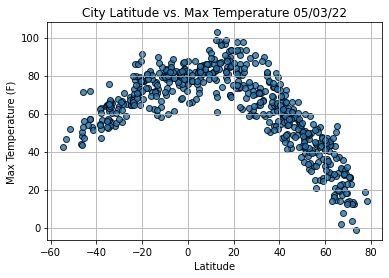

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()